--------------------------------------------------------------------------------
     Car Make    Car Model  Year  Mileage      Price Fuel Type   Color  \
0     Hyundai       Tucson  2010    52554  44143.820    Hybrid   Black   
1  Land Rover  Range Rover  2016   115056  25414.060    Diesel  Silver   
2       Honda       Accord  2022    18044  28262.872  Electric  Yellow   
3         Kia         Soul  2011    79251  28415.848    Hybrid  Orange   
4  Volkswagen         Golf  2022    40975  31509.792  Electric  Silver   

  Transmission                                   Options/Features Condition  \
0    Automatic                                       Heated Seats      Used   
1       Manual                                                GPS      Used   
2       Manual       Bluetooth, Leather Seats, Backup Camera, GPS  Like New   
3       Manual    Backup Camera, GPS, Heated Seats, Leather Seats       New   
4    Automatic  Leather Seats, Remote Start, Sunroof, Heated S...       New   


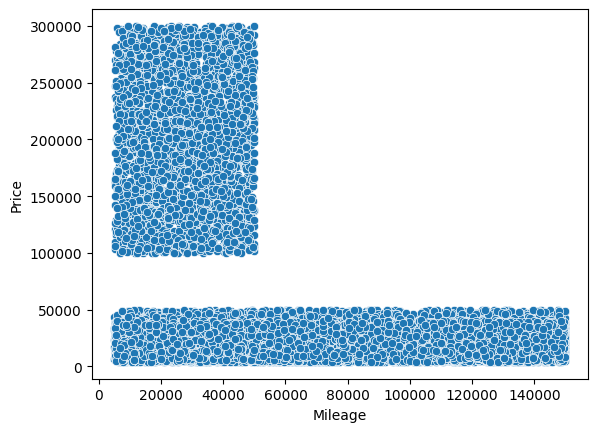

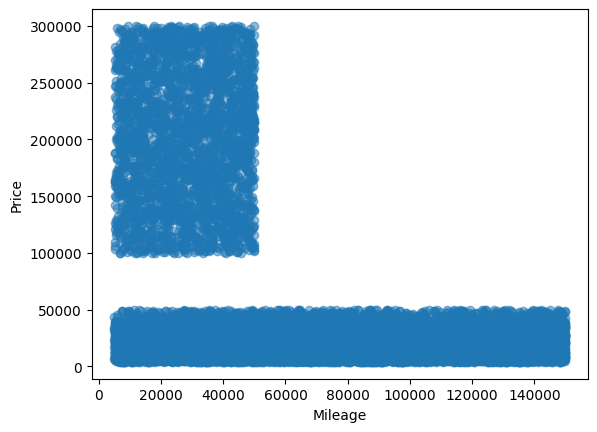

Der Koeffizient beträgt:
[[-0.54438388]]
Der Y-Achsenabschnitt beträgt
[84869.01600858]
Daraus folgt folgendes mathematisches Modell:
y = [84869.01600858] + [[-0.54438388]] * x
Für x = 25000 ergibt sich eine Vorhersage von y = 71259.42 Euro
--------------------------------------------------------------------------------
Modellbewertung:
Mean Squared Error (MSE): 3580979251.42
Mean Absolute Error (MAE): 39970.79
R²-Score: 0.1326


In [6]:
#1. Relevante Bibliotheken importieren 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#2. Datensatz laden
df=pd.read_csv(r"C:\Users\goex1\Desktop\Selbst erstellte Analysen\Elektroautos Datensatz\Updated_Car_Sales_Data.csv")

print("--------------------------------------------------------------------------------")

#3. Erste Übersicht von dem Datensatz anzeigen
print(df.head())


print(f"""Der Datensatz hat die Form {df.shape}.
Er besteht aus {df.shape[0]} Datenpunkten und {df.shape[1]} Spalten.""")

print("--------------------------------------------------------------------------------")
#4. Datenbereinigung 
print("Datenbereinigung-Wie viele Null-Werte sind vorhanden?")
print(df.isnull().sum())
#Es sind keine Null-Werte vorhanden. Bereinigung nicht notwendig




print("--------------------------------------------------------------------------------")
#5. Deskriptive Statistiken der metrischen Variablen erstellen
print("Deskriptive Statistiken der metrischen Variablen")
print(df.describe())

print("Streudiagramm von Mileage und Price")
print(sns.scatterplot(df,x="Mileage", y="Price"))


#6. Korrelation der metrischen Variablen überprüfen
print("Korrelation der metrischen Variablen")
df.corr("pearson", numeric_only=True) 


#7. Lineare Regression
from sklearn.linear_model import LinearRegression

y=df["Price"]
y = df["Price"].values.reshape(-1,1)
x=df["Mileage"].values.reshape(-1,1)

clf=LinearRegression()

clf.fit(x,y)

#Die verschiedenen Werte für x#
x_values=np.linspace(2000,2020).reshape(-1,1)

pred=clf.predict(x_values)

fig=plt.figure()
plt.scatter(x,y,alpha=0.5)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

#Interpretation der Ergebnisse

print("Der Koeffizient beträgt:")
print(clf.coef_)

print("Der Y-Achsenabschnitt beträgt")
print(clf.intercept_)


print("Daraus folgt folgendes mathematisches Modell:")

print(f"y = {clf.intercept_} + {clf.coef_} * x")


x_eingegebener_Wert = 25000
y_predicted = clf.intercept_[0] + clf.coef_[0][0] * x_eingegebener_Wert

print(f"Für x = {x_eingegebener_Wert} ergibt sich eine Vorhersage von y = {y_predicted:.2f} Euro")




from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 9. Modellgüte berechnen
y_hat = clf.predict(x)
mse = mean_squared_error(y, y_hat)
mae = mean_absolute_error(y, y_hat)
r2 = r2_score(y, y_hat)

print("--------------------------------------------------------------------------------")
print("Modellbewertung:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R²-Score: {r2:.4f}")

Multiple Lineare Regression: Weitere unabhängige Variable hinzugefügt

Die einfache, lineare Regression wird um eine unabhängige Variable 'Baujahr' erweitert. Daraus ergibt sich folgende multiple, lineare Regression:
--------------------------------------------------------------------------------
[[-5.07161953e-01  3.63398035e+03]]
[-7245365.18116805]
Aus der Regression ergibt sich folgende Regressionsgleichung:
y = -7245365.18 + -0.51 * Mileage + 3633.98 * Year
Bei einer Kilometerzahl von 5000 und dem Baujahr 2017 ergibt sich folgende Preisprognose in Euro:
[[81837.38465424]]
--------------------------------------------------------------------------------


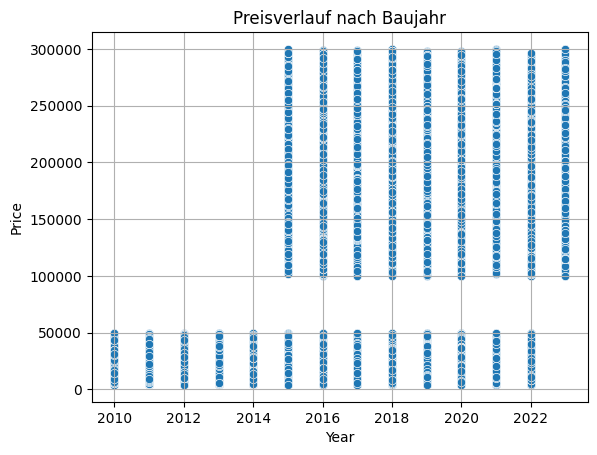

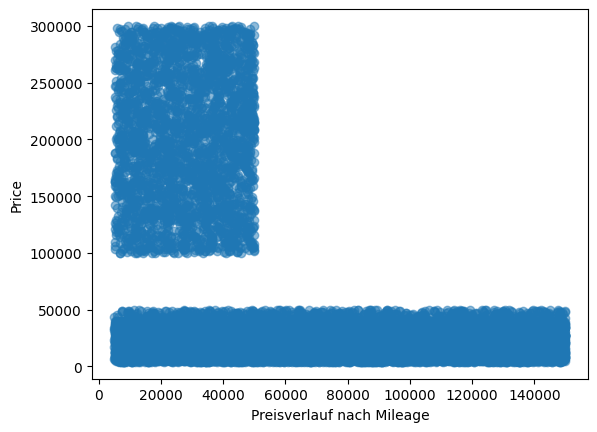

--------------------------------------------------------------------------------
Fazit: Die unabhängige Variable 'Mileage' hat einen negativen Einfluss auf den Verkaufspreis, wenn alle anderen Variablen konstant gehalten werden. Je höher die Kilometerzahl Mileage ist, desto niedriger ist der Verkaufspreis. Die zweite unabhängige Variable 'Year' hat einen positiven Einfluss auf den Verkaufspreis, wenn alle anderen Variablen konstant gehalten werden. Je neuer das Auto ist, desto höher ist der Verkaufspreis.
--------------------------------------------------------------------------------
Güte des Modells
R²-Score: 0.1771
MSE: 3,397,214,002.79
MAE: 39,739.11


In [62]:
print("Die einfache, lineare Regression wird um eine unabhängige Variable 'Baujahr' erweitert. Daraus ergibt sich folgende multiple, lineare Regression:")


#1. Relevante Bibliotheken importieren 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#2. Datensatz laden
df=pd.read_csv(r"C:\Users\goex1\Desktop\Selbst erstellte Analysen\Elektroautos Datensatz\Updated_Car_Sales_Data.csv")

print("--------------------------------------------------------------------------------")

from sklearn.linear_model import LinearRegression
clf=LinearRegression()

target = df["Price"].values.reshape(-1,1)

x_values = df[["Mileage", "Year"]].values

clf.fit(x_values,target)

print(clf.coef_)
print(clf.intercept_)


print("Aus der Regression ergibt sich folgende Regressionsgleichung:")

print(f"y = {clf.intercept_[0]:.2f} + {clf.coef_[0][0]:.2f} * Mileage + {clf.coef_[0][1]:.2f} * Year")


print("Bei einer Kilometerzahl von 5000 und dem Baujahr 2017 ergibt sich folgende Preisprognose in Euro:")
print(clf.predict(np.array([[5000, 2017]])))

print("--------------------------------------------------------------------------------")



#Grafische Darstellung
sns.scatterplot(data=df, x="Year", y="Price")
plt.title("Preisverlauf nach Baujahr")
plt.grid(True)
plt.show()


fig=plt.figure()
plt.scatter(x,y,alpha=0.5)
plt.xlabel("Preisverlauf nach Mileage")
plt.ylabel("Price")
plt.show()

print("--------------------------------------------------------------------------------")

print("Fazit: Die unabhängige Variable 'Mileage' hat einen negativen Einfluss auf den Verkaufspreis, wenn alle anderen Variablen konstant gehalten werden. Je höher die Kilometerzahl Mileage ist, desto niedriger ist der Verkaufspreis. Die zweite unabhängige Variable 'Year' hat einen positiven Einfluss auf den Verkaufspreis, wenn alle anderen Variablen konstant gehalten werden. Je neuer das Auto ist, desto höher ist der Verkaufspreis.") 


print("--------------------------------------------------------------------------------")

print("Güte des Modells")

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = clf.predict(x_values)

print(f"R²-Score: {r2_score(target, y_pred):.4f}")
print(f"MSE: {mean_squared_error(target, y_pred):,.2f}")
print(f"MAE: {mean_absolute_error(target, y_pred):,.2f}")


